In [3]:
%pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 40.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Nombre d'images chargées: 80


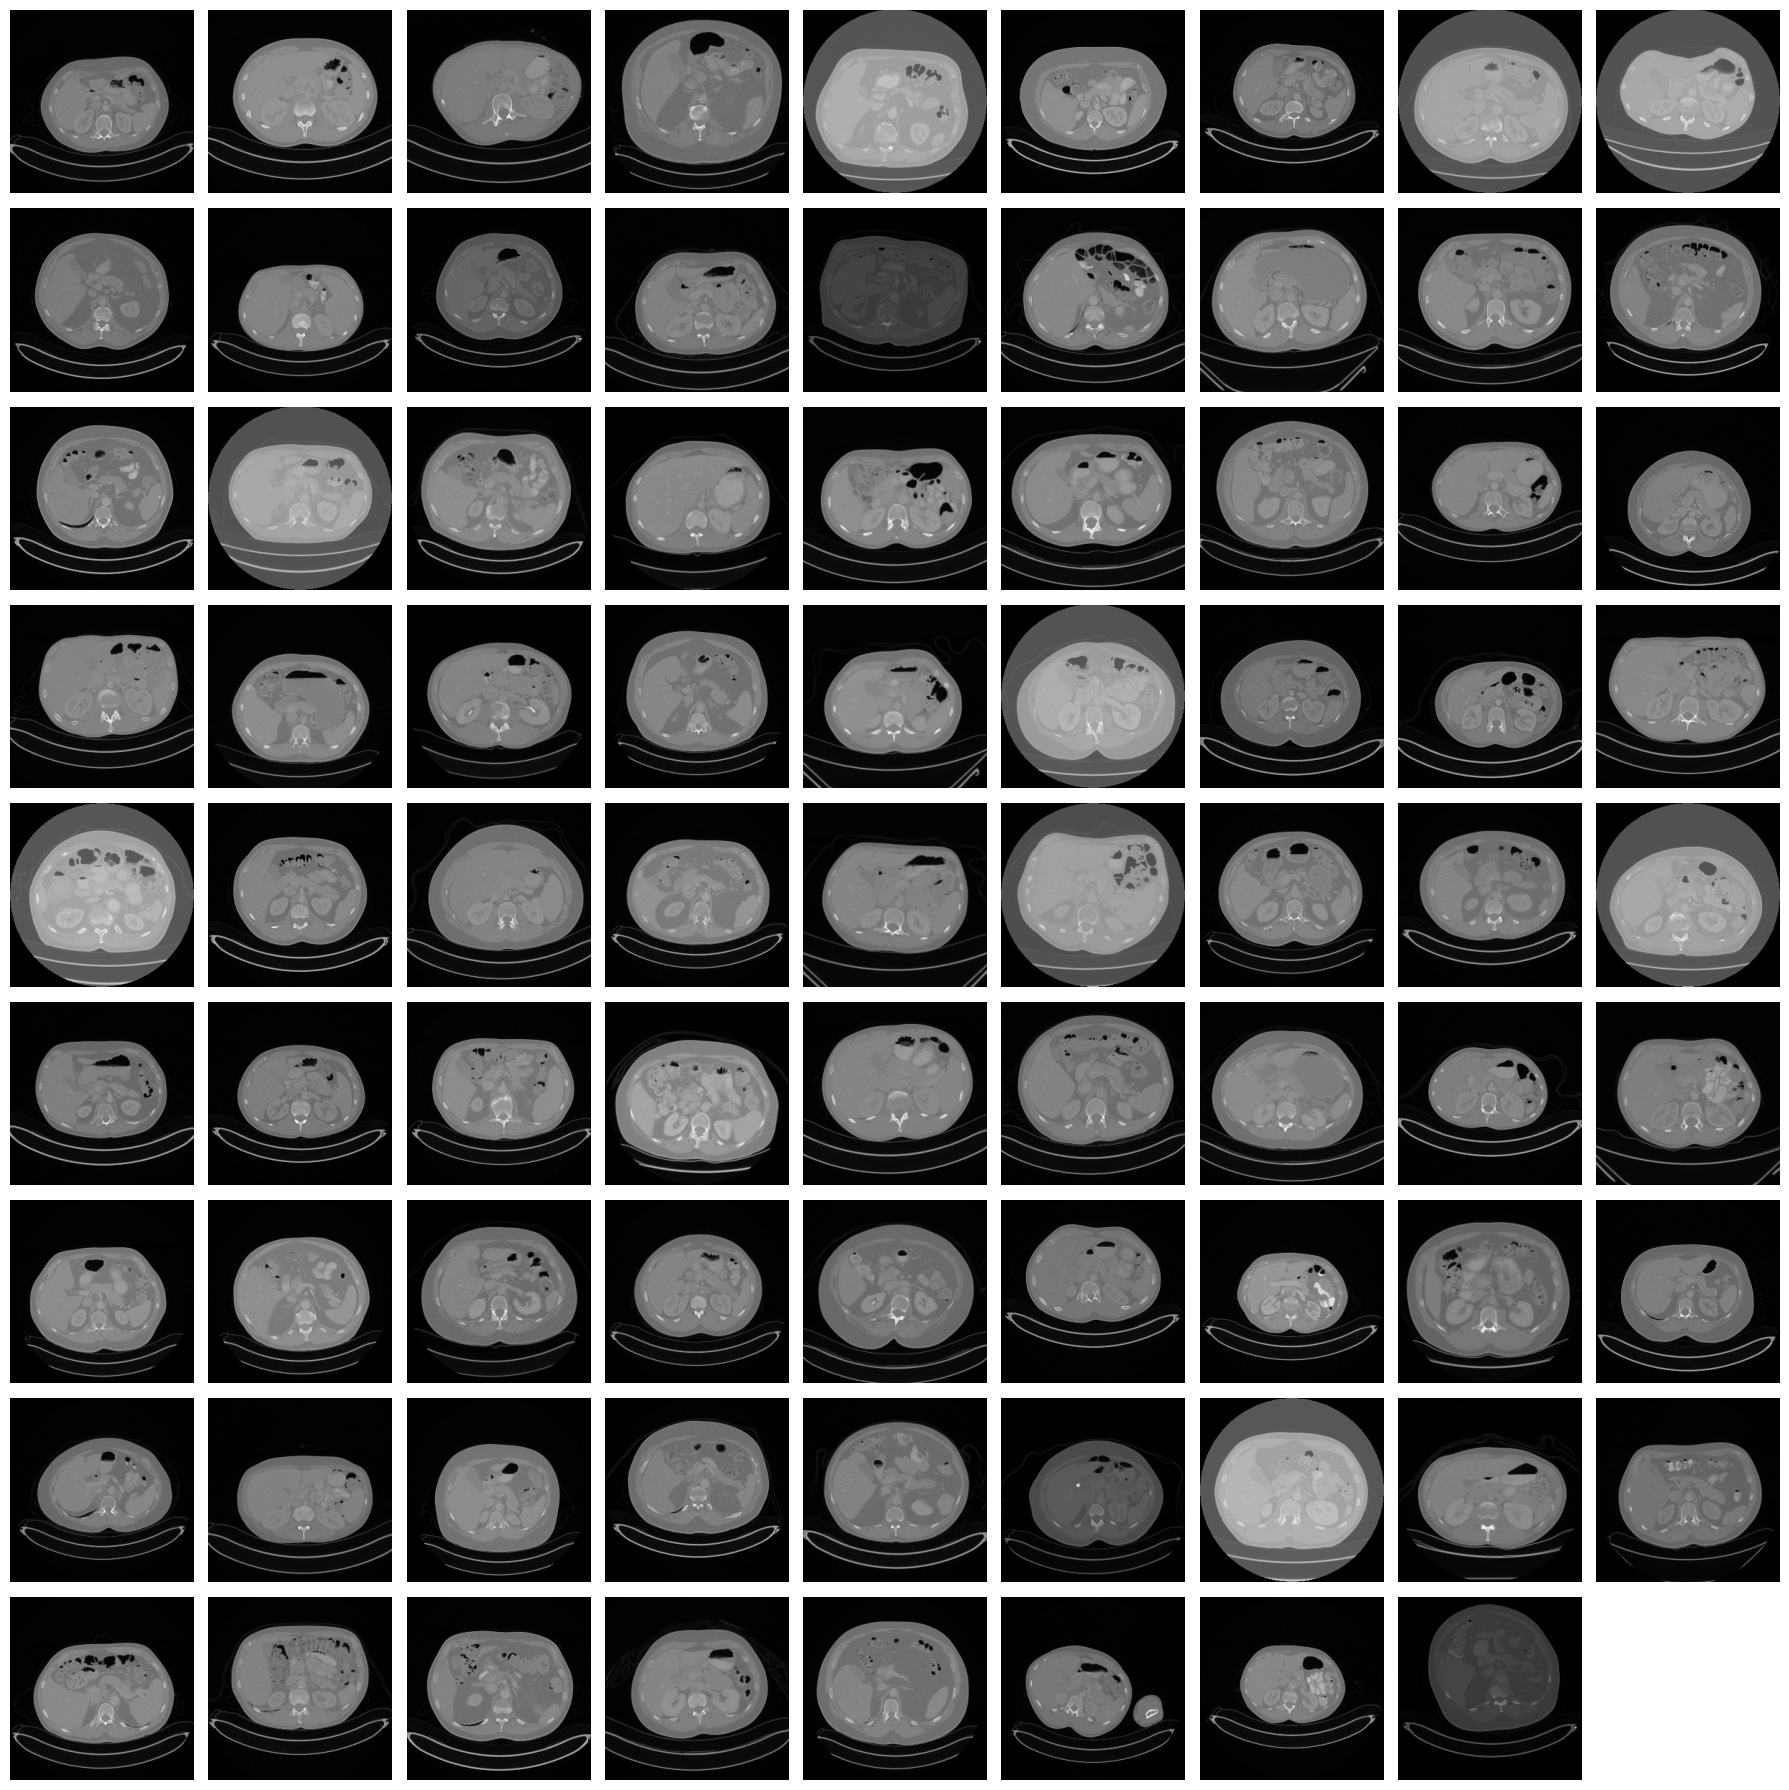

In [4]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

root_dir = './data/Pancreas_2mm_v2'

def load_image(mhd_path):
    image = sitk.ReadImage(mhd_path)

    slice_index = image.GetSize()[2] // 2
    slice_image = image[:, :, slice_index]

    slice_array = sitk.GetArrayFromImage(slice_image)
    return slice_array

images = []

# Parcourir tous les dossiers PANCREAS_0001 à PANCREAS_0082 (sauf le 0025 et 0070 qui n'existent pas)
for i in range(1, 83):
    if i in [25, 70]:
        continue
    folder_name = f'PANCREAS_{i:04d}'
    
    ct_2mm_dir = os.path.join(root_dir, folder_name, 'ct_2mm')
    
    if os.path.exists(ct_2mm_dir):
        mhd_file = os.path.join(ct_2mm_dir, f'{folder_name}.mhd')
        raw_file = os.path.join(ct_2mm_dir, f'{folder_name}.raw')

        if os.path.exists(mhd_file) and os.path.exists(raw_file):

            image_slice = load_image(mhd_file)
            images.append(image_slice)
        else:
            print(f"Fichiers manquants pour {folder_name}: {mhd_file} ou {raw_file}")
    else:
        print(f"Dossier {ct_2mm_dir} introuvable.")

print(f"Nombre d'images chargées: {len(images)}")

num_images = len(images)
ncols = 9
nrows = (num_images // ncols) + (1 if num_images % ncols != 0 else 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))

axes = axes.flat

for idx, ax in enumerate(axes):
    if idx < num_images:
        ax.imshow(images[idx], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [1]:
pip install opengate

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 20.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 MB 24.0 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 kB 21.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.7/653.7 kB 17.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 MB 22.0 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 MB 24.0 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 29.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 MB 32.8 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 36.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python -m venv opengate_env
!source opengate_env/bin/activate
%pip install --upgrade pip
%pip install opengate

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).
